# Data Analysis

Data analysis of preprocessed and merged data. Dataset contains flow and weather data, with additional date time features.

In [38]:
%matplotlib inline
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import numpy as np
import os

Importing data.

In [39]:
#input_file_name = "mergedLinearly.csv"
input_file_name = "mergedLinearlySorted.csv"
input_file_path = os.path.join(os.path.join(os.getcwd(), "data"), input_file_name)

data = pd.read_csv(input_file_path, index_col=0, parse_dates=True)
data.head()
#load_data.shape

id14061671  id14061684  id14061709  id14061716  \
2011-01-01 00:30:00           0           0          75          15   
2011-01-01 00:45:00           0           0          79          15   
2011-01-01 01:00:00           0           0          77          15   
2011-01-01 01:15:00           0           0          81          16   
2011-01-01 01:30:00           0           0          82          14   

                     id14061685  id14061674  id14061721  id14061680  \
2011-01-01 00:30:00          37          18          13           4   
2011-01-01 00:45:00          33          17          10           4   
2011-01-01 01:00:00          32          21          12           4   
2011-01-01 01:15:00          36          19          13           4   
2011-01-01 01:30:00          34          18          10           4   

                     id14061714  id11010024     ...       veter_vek_smer  \
2011-01-01 00:30:00           0           1     ...                100.0   
2011-01-01 00:45:00           0           0     ...                102.0   
2011-01-01 01:00:00           0           0     ...                104.0   
2011-01-01 01:15:00           0           1     ...                108.5   
2011-01-01 01:30:00           0           0     ...                113.0   

                     veter_max_hitrost  energija_gl  energija_di  HourOfDay  \
2011-01-01 00:30:00               1.90            0            0          0   
2011-01-01 00:45:00               1.65            0            0          0   
2011-01-01 01:00:00               1.40            0            0          1   
2011-01-01 01:15:00               1.50            0            0          1   
2011-01-01 01:30:00               1.60            0            0          1   

                     DayOfWeek  Month  Weekday  Weekend  BusinessDay  
2011-01-01 00:30:00          5      1        0        1            0  
2011-01-01 00:45:00          5      1        0        1            0  
2011-01-01 01:00:00          5      1        0        1            0  
2011-01-01 01:15:00          5      1        0        1            0  
2011-01-01 01:30:00          5      1        0        1            0  

[5 rows x 53 columns]

## Timeseries Plot

In [2]:
_ = data[["id12041022","id14061671","id14061684"]].plot(subplots=True, layout=(3,1), style=['b','b','b'], 
                                                       figsize=(20,14), x_compat=True, sharex=False)                                               

NameError: name 'data' is not defined

Sensor "id12041022" is the main RTP node, and "id14061671" and "id14061684" are the main consumers in the grid, which can be seen from the above figure.

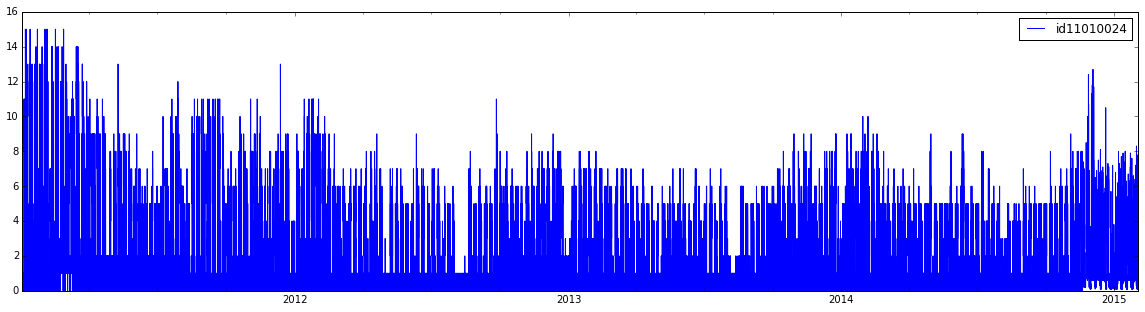

In [4]:
data[["id11010024"]].plot(figsize=(20,5))                                                

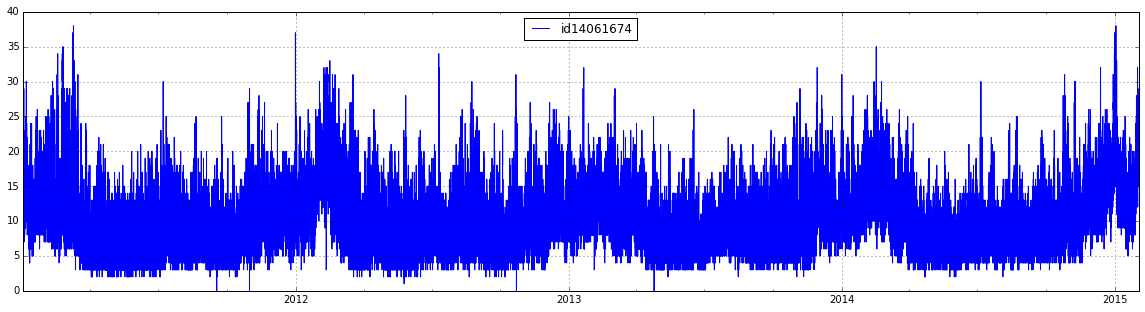

In [15]:
data[["id14061674"]].plot(figsize=(20,5))                                                

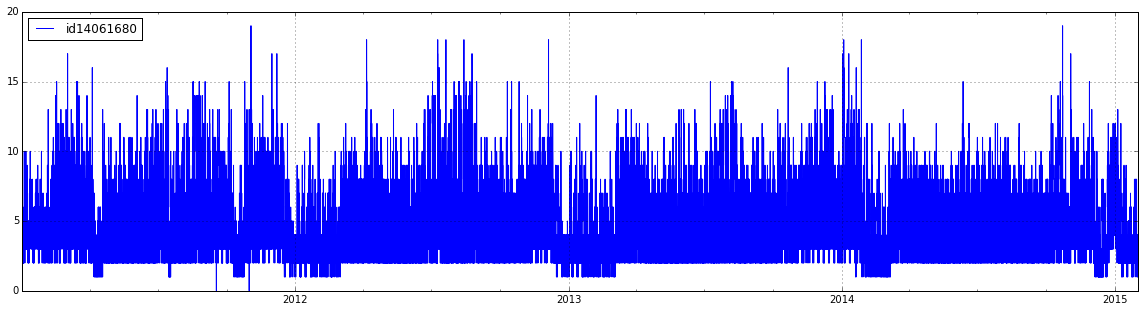

In [16]:
data[["id14061680"]].plot(figsize=(20,5))                                                

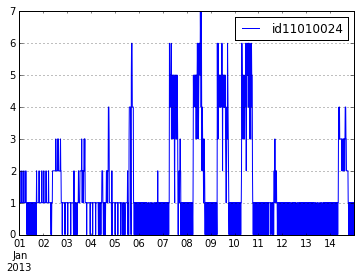

In [18]:
data['2013-01-01':'2013-01-14'][["id11010024"]].plot()                                                

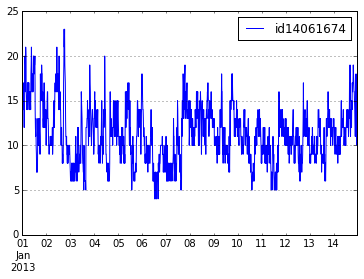

In [17]:
data['2013-01-01':'2013-01-14'][["id14061674"]].plot()                                                

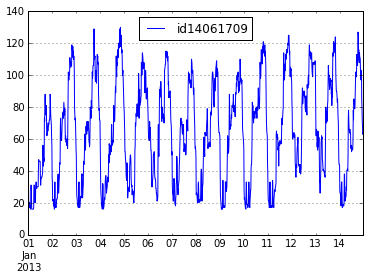

In [24]:
data['2013-01-01':'2013-01-14'][["id14061709"]].plot()                                                

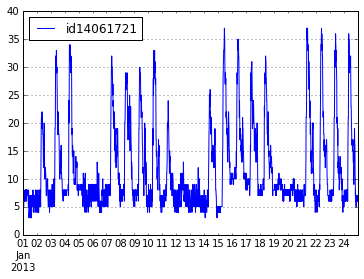

In [44]:
data['2013-01-01':'2013-01-24'][["id14061721"]].plot()                                                

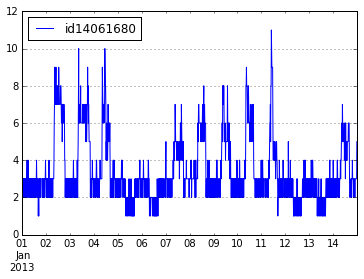

In [39]:
data['2013-01-01':'2013-01-14'][["id14061680"]].plot()                                                

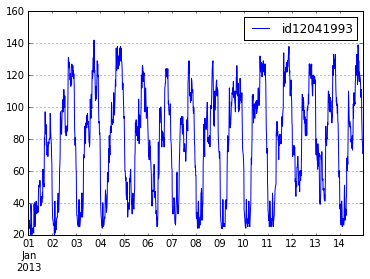

In [23]:
data['2013-01-01':'2013-01-14'][["id12041993"]].plot()                                                

## Correlations with weather

In [84]:
data.columns

Index([u'id14061671', u'id14061684', u'id14061709', u'id14061716',
       u'id14061685', u'id14061674', u'id14061721', u'id14061680',
       u'id14061714', u'id11010024', u'id11010019', u'id14061707',
       u'id11010017', u'id14061677', u'id11010020', u'id14061729',
       u'id12041022', u'id12041989', u'id12041991', u'id14061609',
       u'id12041992', u'id12041987', u'id12041988', u'id12041993',
       u'id14061722', u'id11010018', u'id12041994', u'id14061693',
       u'id14061706', u'id14061723', u'p', u'pmin', u'pmax', u't2m_termin',
       u't2m', u't2mmin', u't2mmax', u'rh_termin', u'rh', u'rhmin', u'rhmax',
       u'padavine', u'veter_hitrost', u'veter_vek_smer', u'veter_max_hitrost',
       u'energija_gl', u'energija_di', u'HourOfDay', u'DayOfWeek', u'Month',
       u'Weekday', u'Weekend', u'BusinessDay'],
      dtype='object')

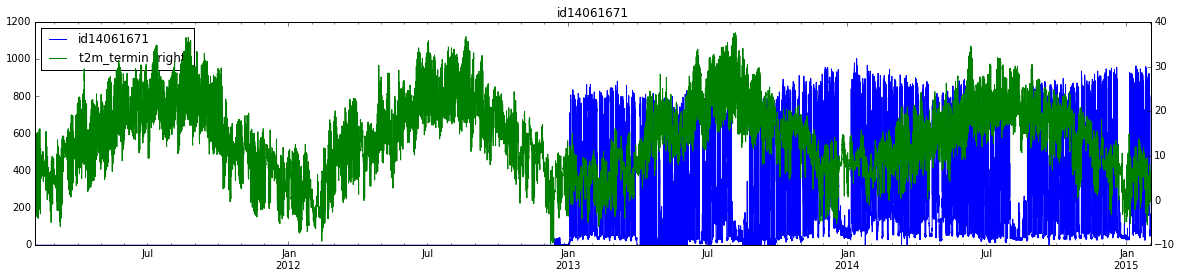

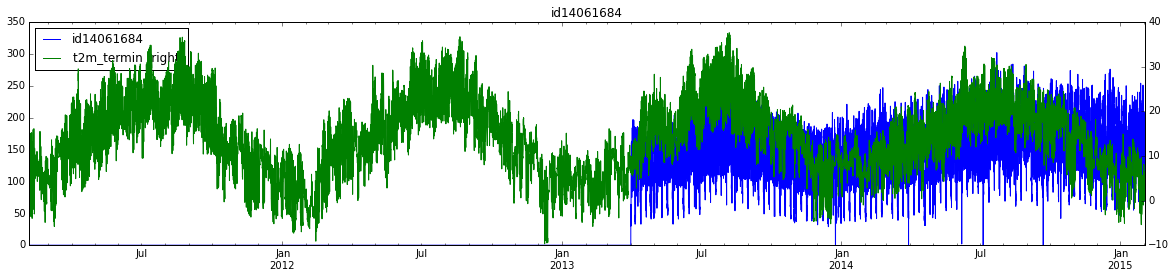

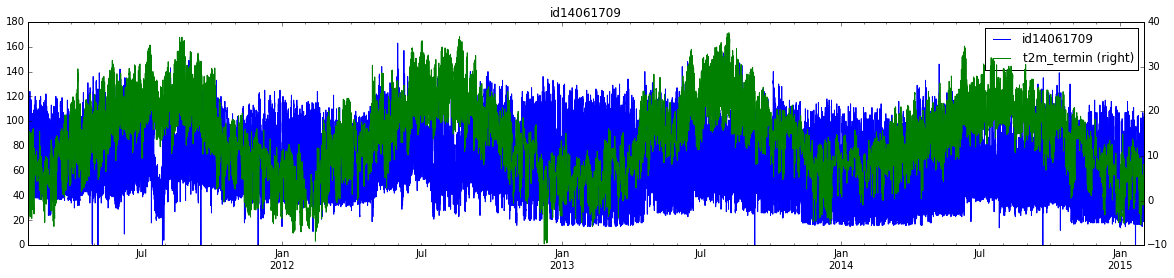

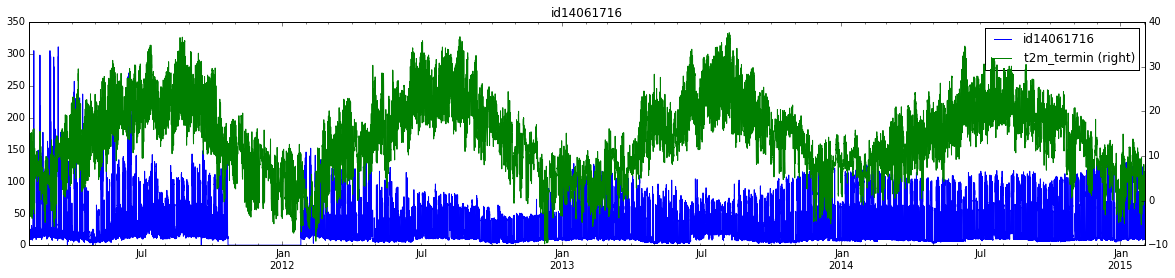

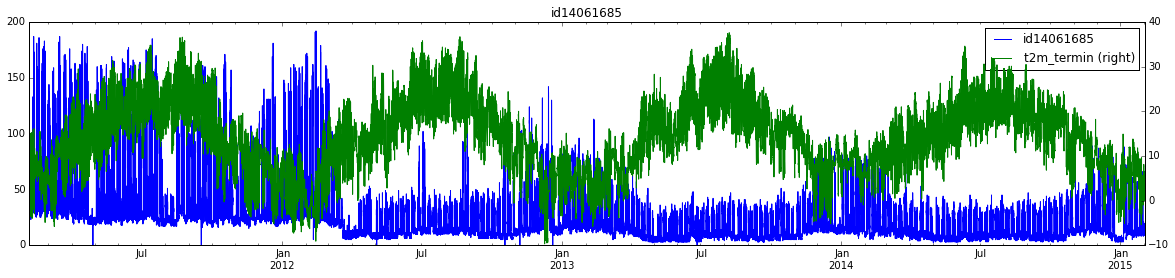

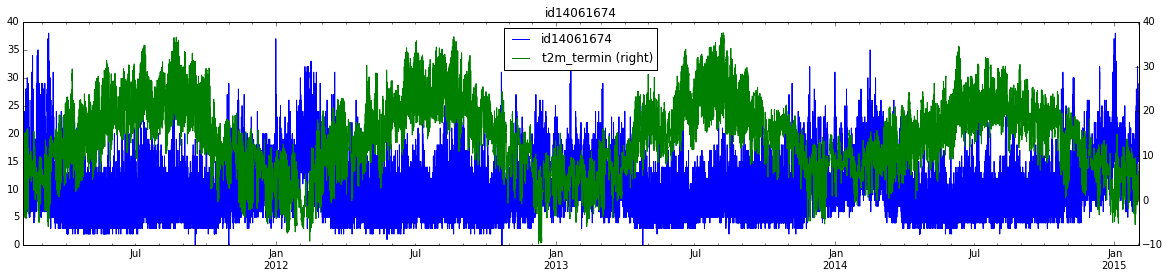

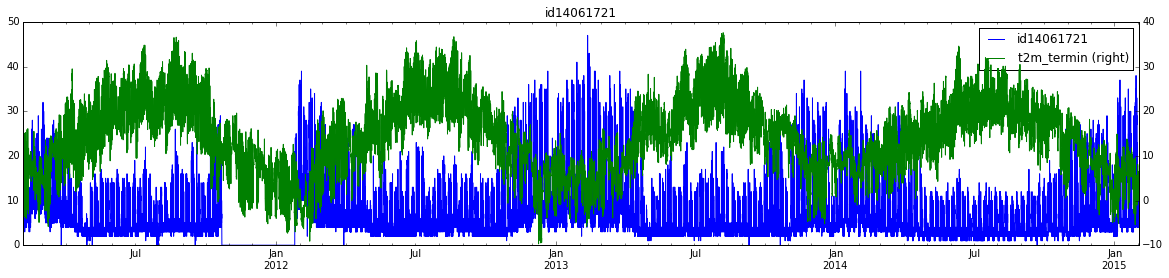

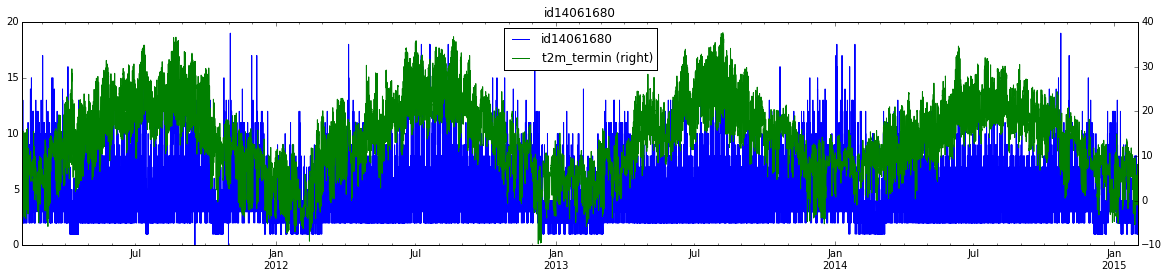

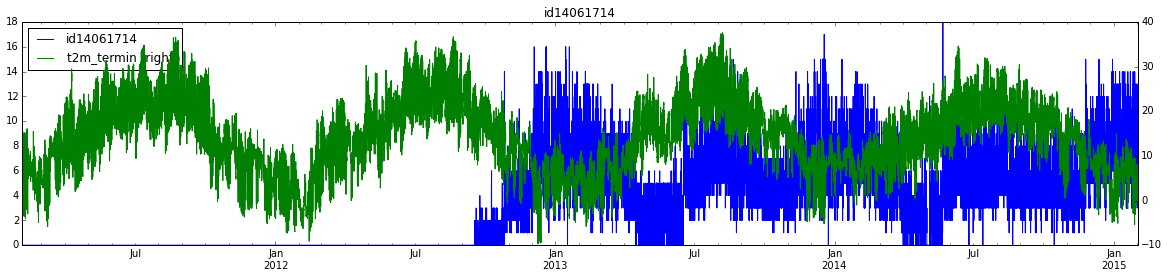

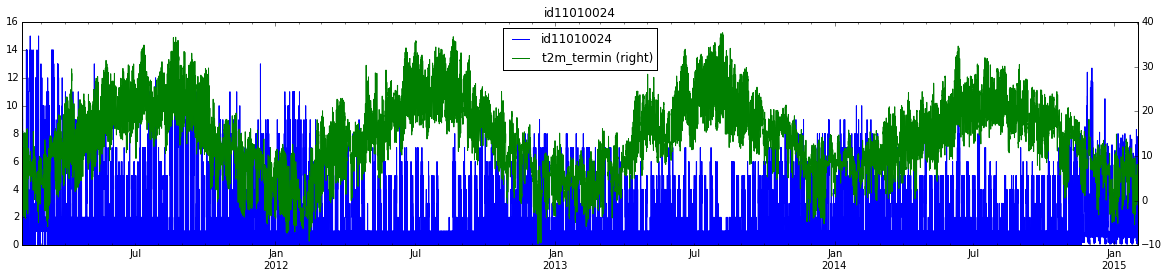

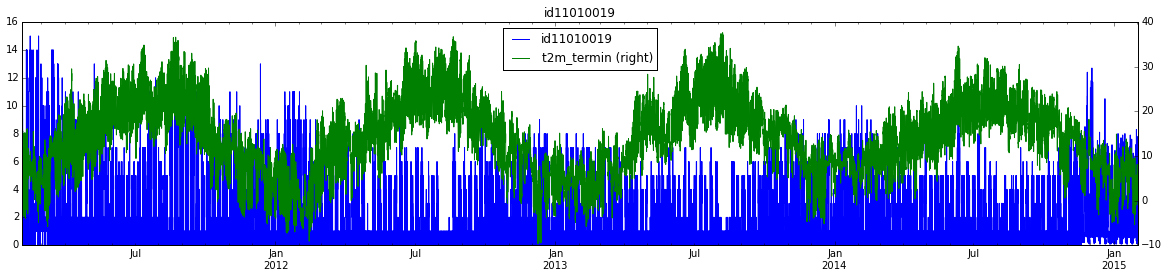

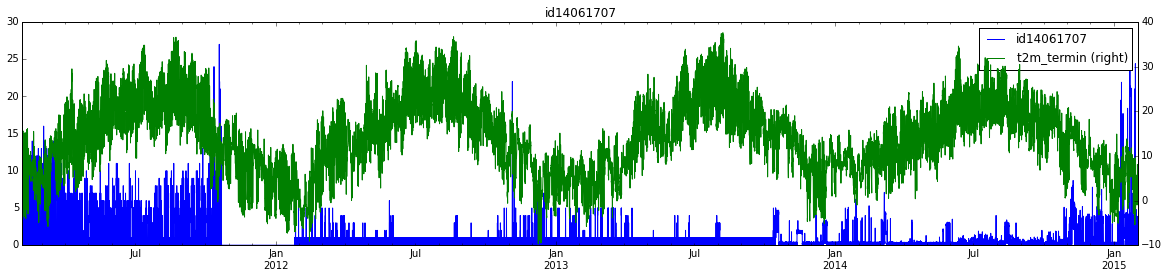

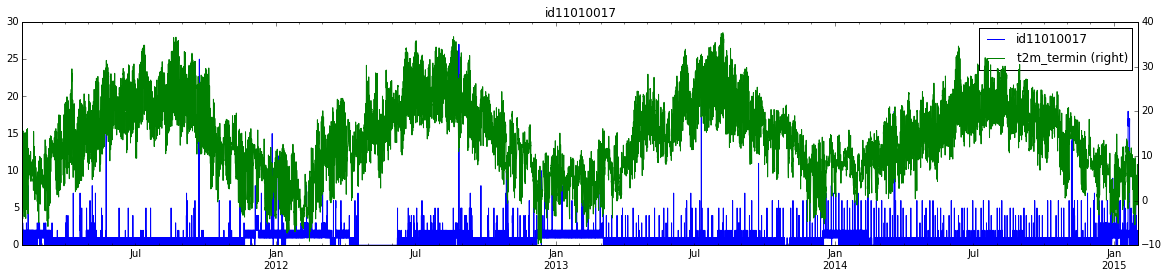

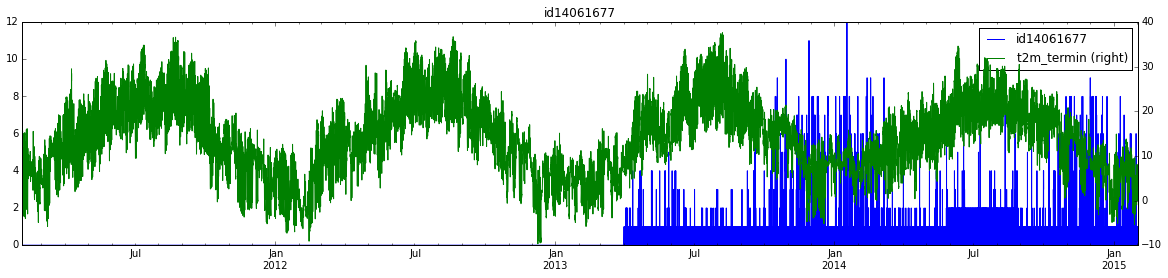

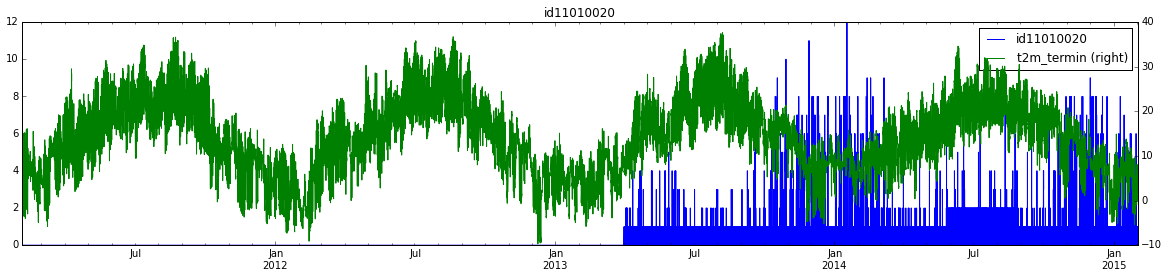

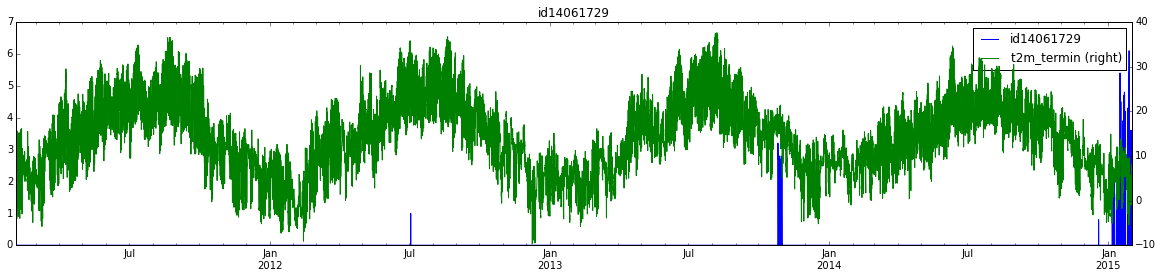

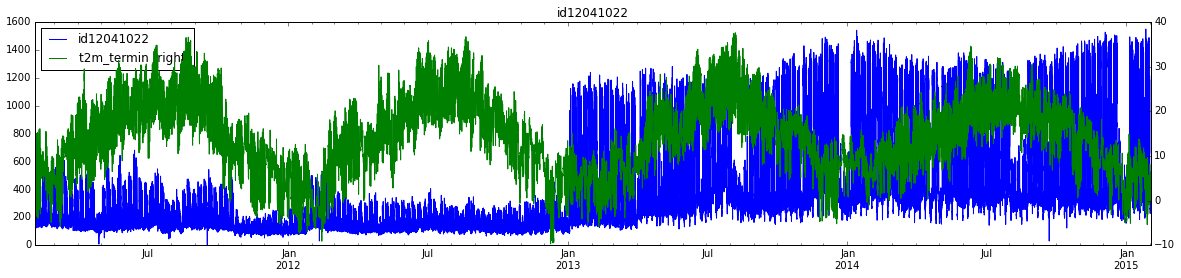

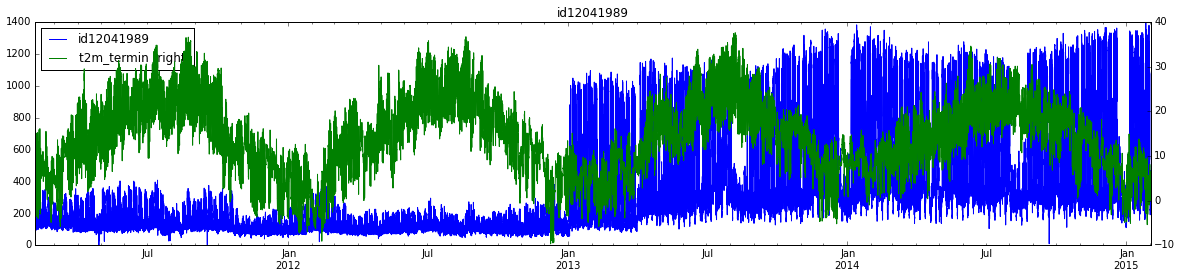

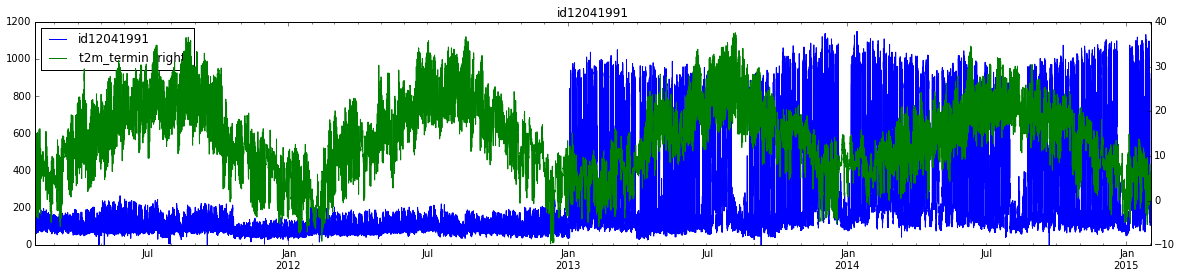

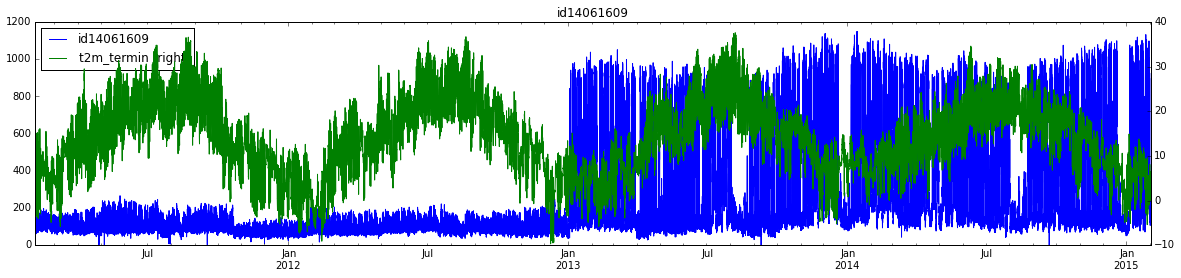

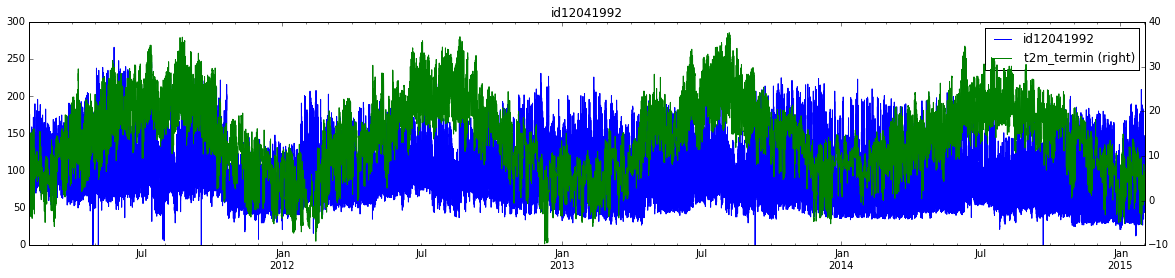

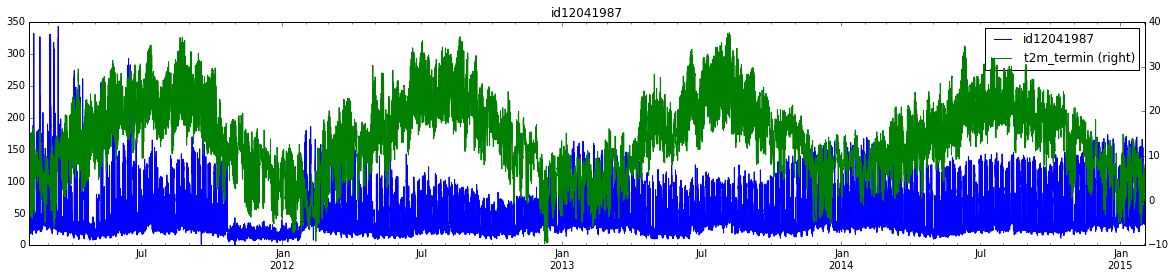

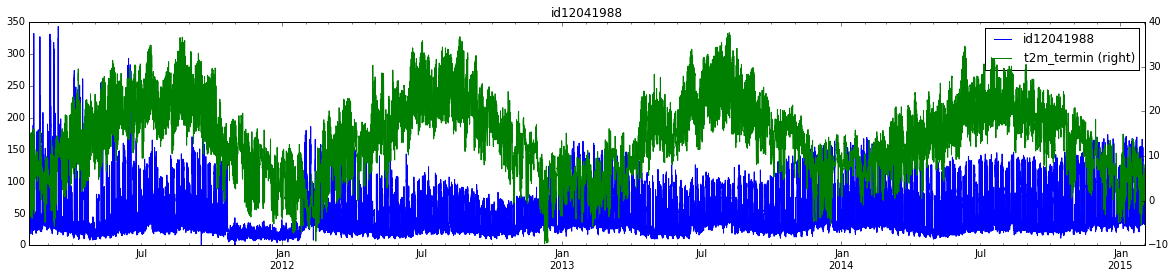

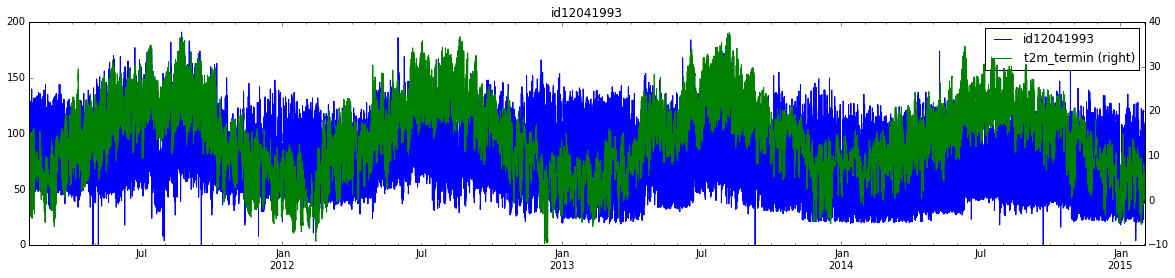

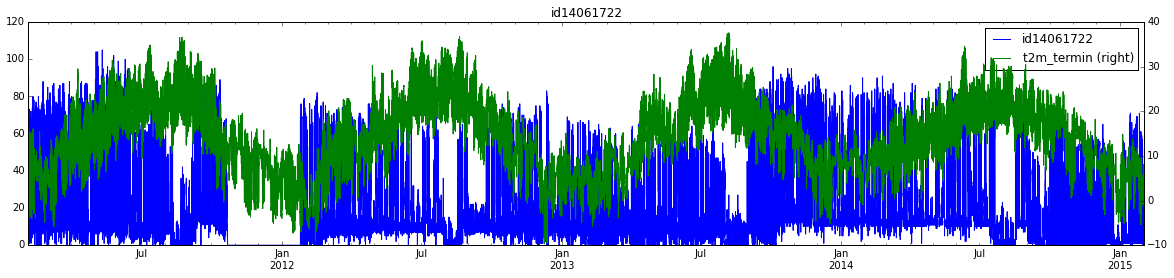

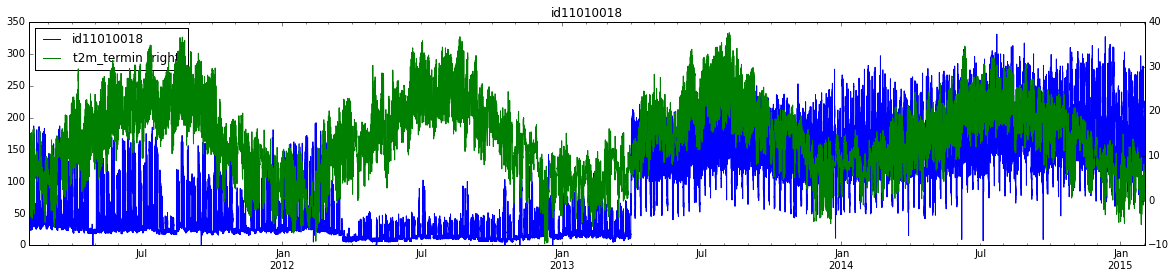

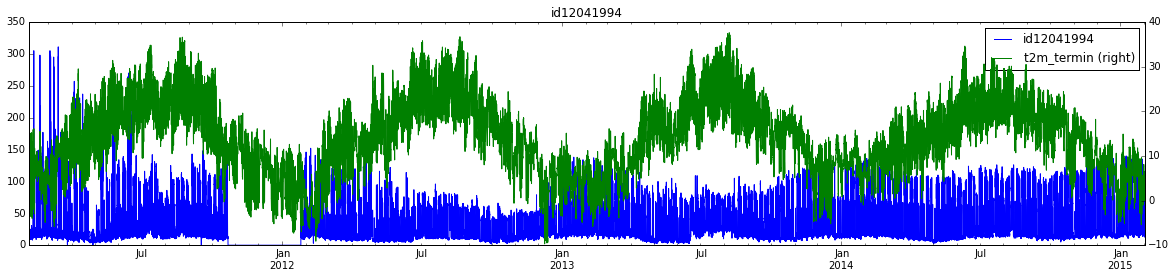

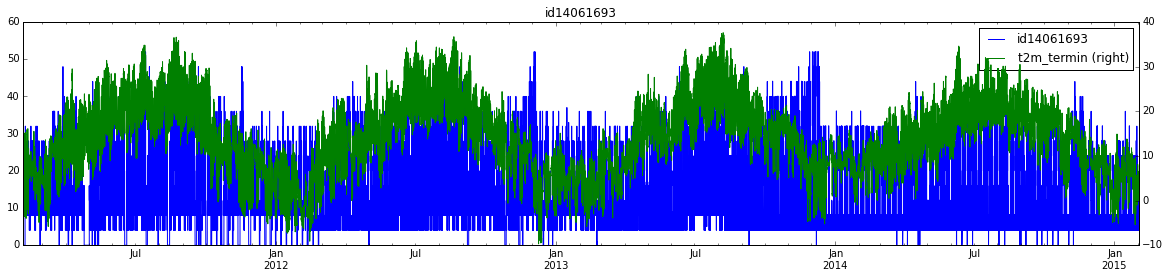

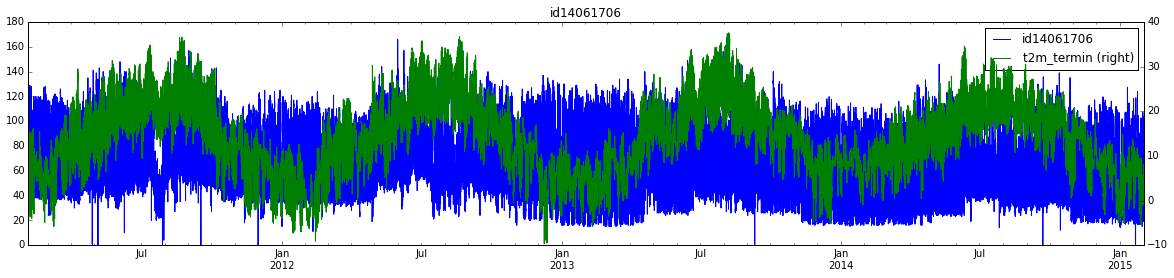

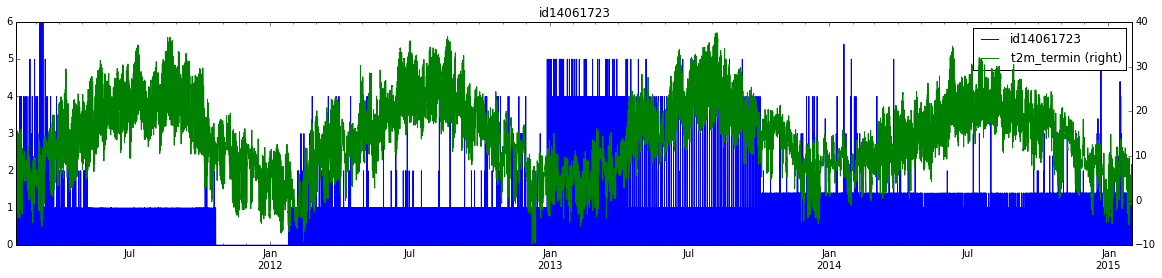

In [91]:
for sensor in data.columns[0:30]:
    ax = data['2011-02-04':'2015-02-24'][[sensor, 't2m_termin']].plot(
        figsize=(20,4), secondary_y=['t2m_termin'], title=sensor)

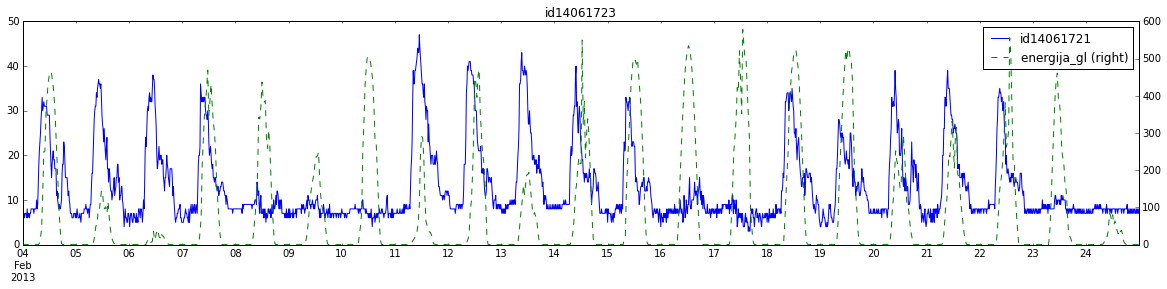

In [93]:
ax = data['2013-02-04':'2013-02-24'][['id14061721', 'energija_gl']].plot(
    figsize=(20,4), secondary_y=['energija_gl'], title=sensor, style=['-','--','--'])

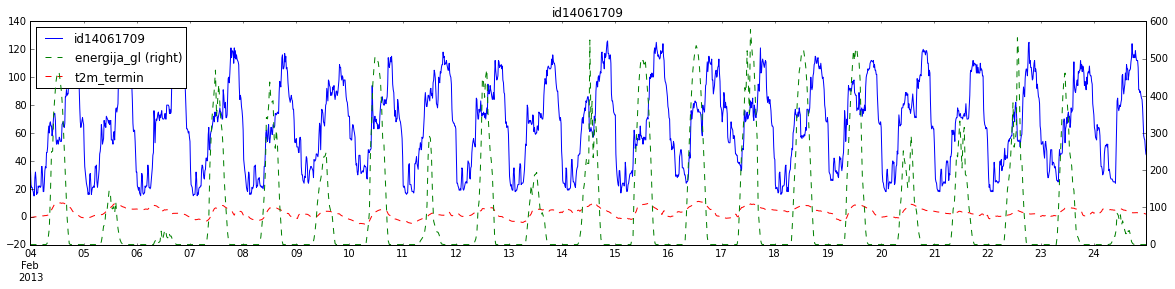

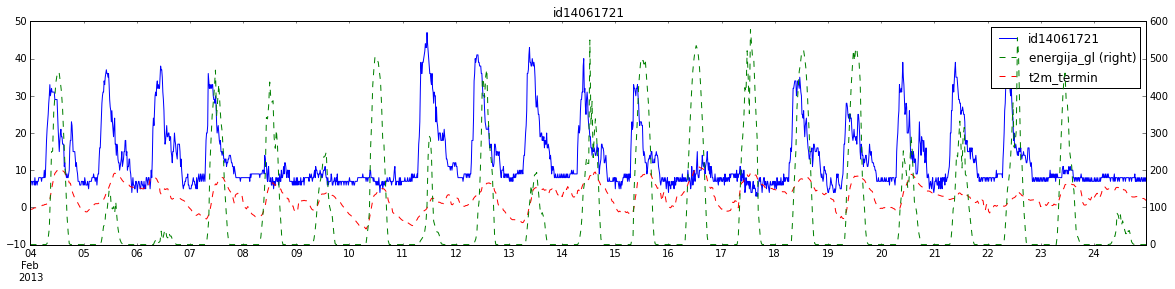

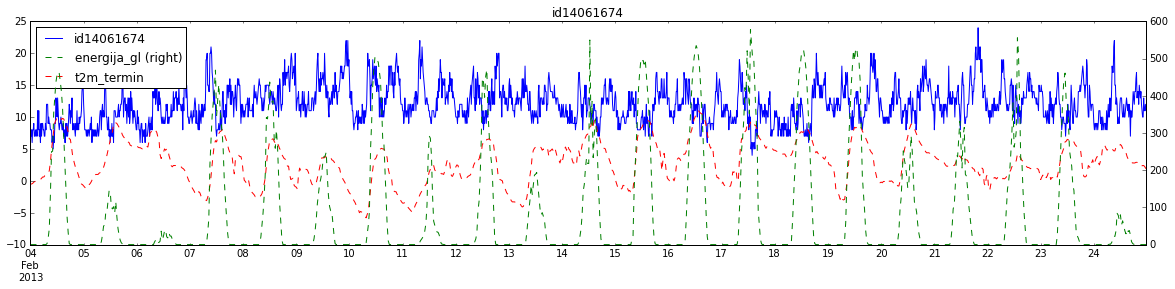

In [89]:
sensors = ["id14061709", "id14061721", "id14061674"]

for sensor in sensors:
    ax = data['2013-02-04':'2013-02-24'][[sensor, 'energija_gl','t2m_termin']].plot(
        figsize=(20,4), secondary_y=['energija_gl'], title=sensor, style=['-','--','--'])
    ax.grid(True)
    ax.yaxis.grid()
    #ax.lines[-2].set_linewidth(2)

## Scatter Matrix

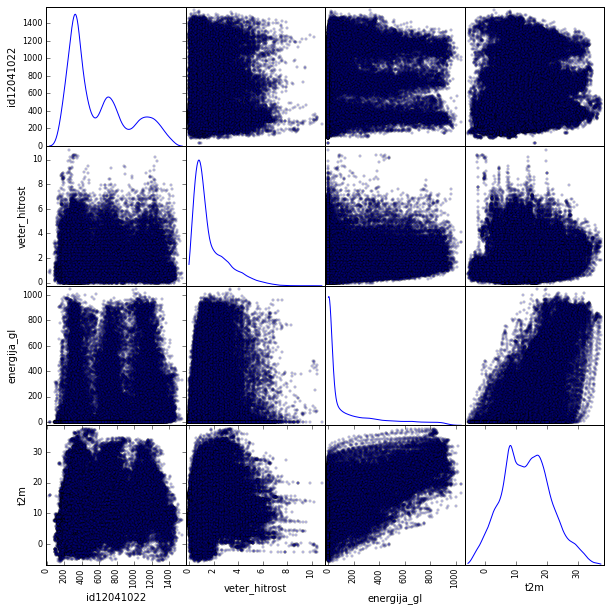

In [5]:
from pandas.tools.plotting import scatter_matrix
_ = scatter_matrix(data['2013-01-01':][["id12041022", "veter_hitrost", "energija_gl", "t2m"]], alpha=0.2, figsize=(10,10), diagonal='kde')

Make some description

TODO: do something better (http://stanford.edu/~mwaskom/software/seaborn/examples/scatterplot_matrix.html)

Example: categorize energy or temp or weekend or temp and make this scatteret plot.

## Correlations

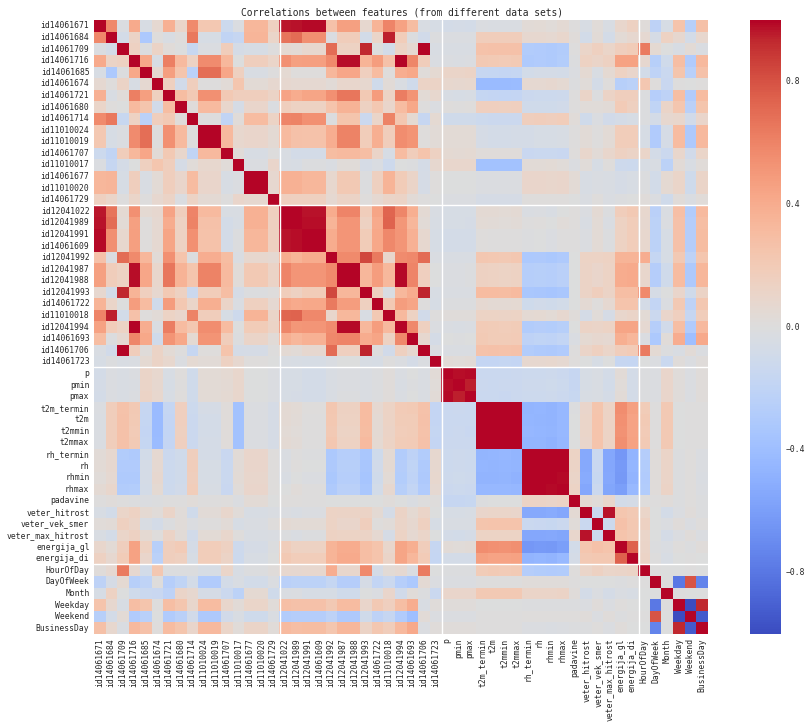

In [6]:
import seaborn as sns
sns.set(context="paper", font="monospace")

corrmat = data.corr()
#corrmat = data['2013-01-07 22:00:00':'2014-01-14 22:00:00'].corr()
#corrmat = data['2014-01-07 22:00:00':'2014-01-14 22:00:00'].corr()

f, ax = plt.subplots(figsize=(15, 11))
sns.heatmap(corrmat, vmax=.8, linewidths=0, cmap="coolwarm", square=True)
#sns.heatmap(corrmat, vmax=.8, linewidths=0, square=True)

# draw white lines between datasets
size = corrmat.shape[1]
ax.axhline(size-16, c="w")
ax.axvline(16, c="w")
ax.axhline(size-30, c="w")
ax.axvline(30, c="w")
ax.axhline(size-47, c="w")
ax.axvline(47, c="w")

plt.title("Correlations between features (from different data sets)")
#f.tight_layout()

#plt.savefig("./figures/correlations.pdf")
#plt.savefig("./figures/correlations.png", dpi=300)

FACT1: We can see that there is a lot more consistent pattern in correlation between higher nodes and weather. Which means that weather data will have a lot more affect in predictions for higher level nodes. For end nodes, there is no clear correlation with weather (except for energija). P and RH doesent look important.

FACT2: a lot of correlations between nodes, especially between higher level nodes. It is probablly a good idea to include measures of other nodes, when making a prediction.

In [ ]:
"""
import seaborn as sns

f, ax = plt.subplots(figsize=(25, 25))
sns.corrplot(data['2014-01-07 22:00:00':'2014-01-14 22:00:00'])
"""